# Statistical Learning Project

# Steps and tasks

# 1. Import required libraries

In [36]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Read data from csv file

In [37]:
data=pd.read_csv("insurance.csv") #Read data from csv file
data.head(10) #Check data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# 3. Perform basic EDA which should include the following and print out your insights at every step

a. Shape of the data

In [38]:
data.shape #Check the shape of the data

(1338, 7)

b. Find data type of each attribute

In [39]:
data.dtypes #Check data types for each column

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

c. Checking the presence of missing values

In [40]:
data.isna().sum() #Verify missing/null values in each column

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Inference: No null values in data set

d. 5 point summary of numerical attributes

In [41]:
data.describe().T #Get the summary of the data

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Inference:
1. The age column data seems to be normally distributed
2. 75% of the people have 2 or less children, very few people have more than 2 children
3. The charges are highly skewed, there are few people who suffer from diseases which require higher charges to be treated, most of the people need basic medicare

e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

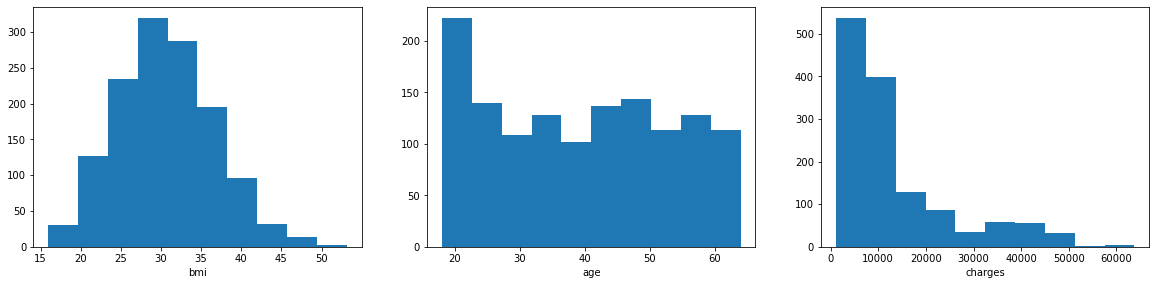

In [42]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(data.bmi); #Plot bmi
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(data.age) #Plot age
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(data.charges) #Plot charges
plt.xlabel('charges')

plt.show()

Inference:
1. bmi looks normally distributed
2. age data seems to distributed quiet uniformly
3. charges are highly skewed

f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [43]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(data.bmi),stats.skew(data.age),stats.skew(data.charges)]},
                        index=['bmi','age','charges']) #Get the skewness of the data
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


Inference:
1. Skew of bmi is very less
2. Age is uiformly distributed and very less skew is observed
3. Charges is highly skewed

g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

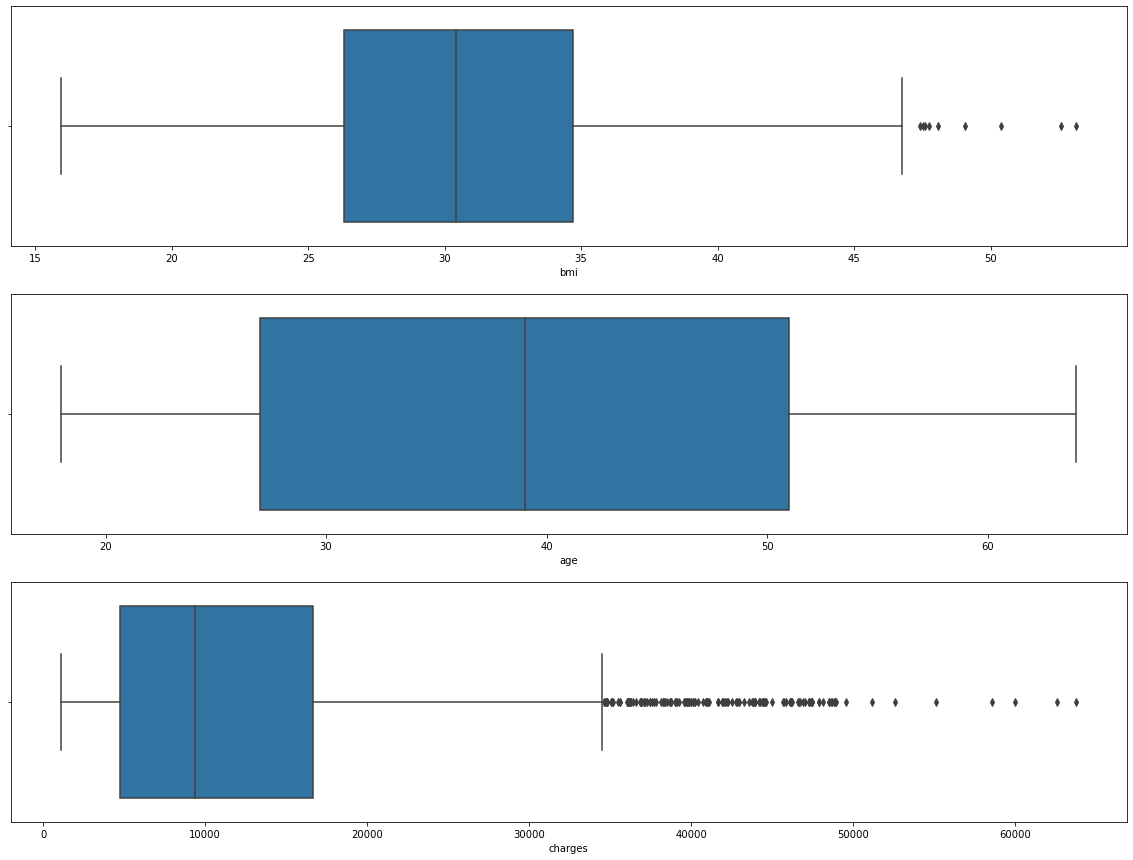

In [44]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= data.bmi); #Box plot for bmi
plt.xlabel('bmi')

plt.subplot(3,1,2)
sns.boxplot(x= data.age) #Box plot for age
plt.xlabel('age')

plt.subplot(3,1,3)
sns.boxplot(x=data.charges) #Box plot for charges
plt.xlabel('charges')

plt.show()

Inference:
1. bmi has few outliers
2. charges have quiet a lot extreme values

h. Distribution of categorical columns

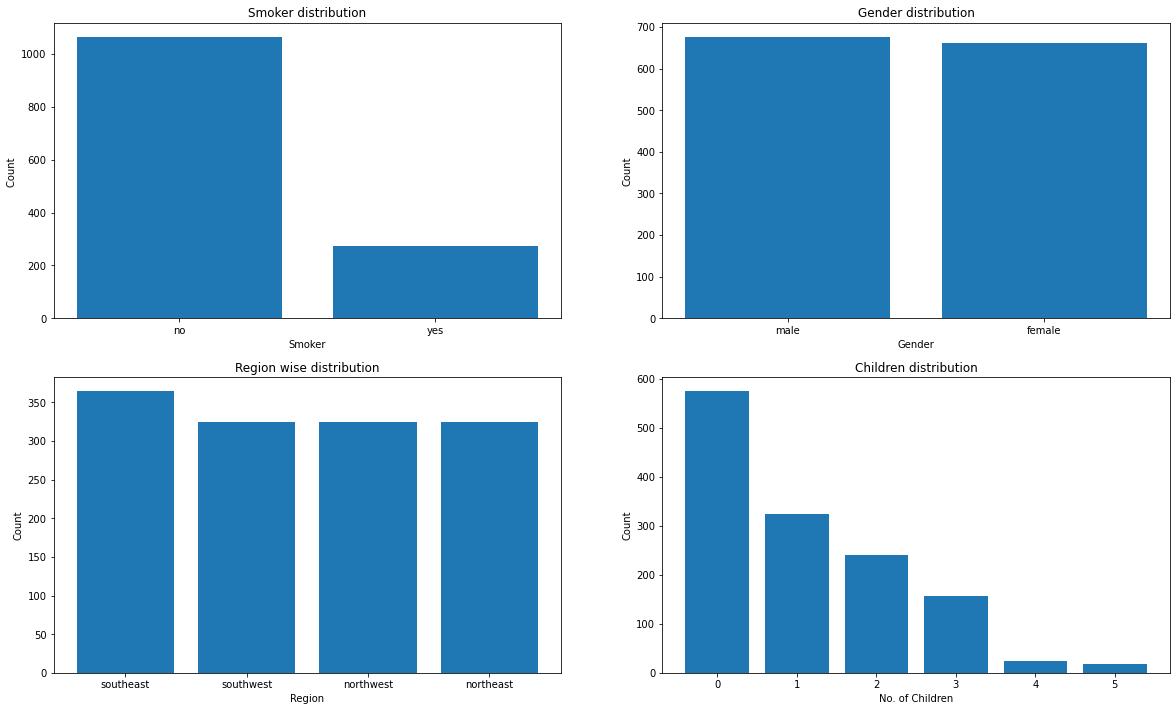

In [45]:
plt.figure(figsize=(20,25))

x = data.smoker.value_counts().index    #Values for x-axis
y = [data['smoker'].value_counts()[i] for i in x] 

plt.subplot(4,2,1)
plt.bar(x,y)  #plot a bar chart
plt.xlabel('Smoker')
plt.ylabel('Count ')
plt.title('Smoker distribution')


x1 = data.sex.value_counts().index    #Values for x-axis
y1 = [data['sex'].value_counts()[j] for j in x1] 

plt.subplot(4,2,2)
plt.bar(x1,y1)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')


x2 = data.region.value_counts().index    #Values for x-axis
y2 = [data['region'].value_counts()[k] for k in x2] 

plt.subplot(4,2,3)
plt.bar(x2,y2)  #plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region wise distribution')

x3 = data.children.value_counts().index    #Values for x-axis
y3 = [data['children'].value_counts()[l] for l in x3] 

plt.subplot(4,2,4)
plt.bar(x3,y3)  #plot a bar chart
plt.xlabel('No. of Children')
plt.ylabel('Count')
plt.title('Children distribution')

plt.show()


Inference:
1. Number of non-smokers is way more than that of smokers
2. Gender is distributed evenly
3. Instances are distributed evenly across regions
4. Most instances have 2 or less children and few have 4 or 5 children

i. Pair plot that includes all the columns of the data frame

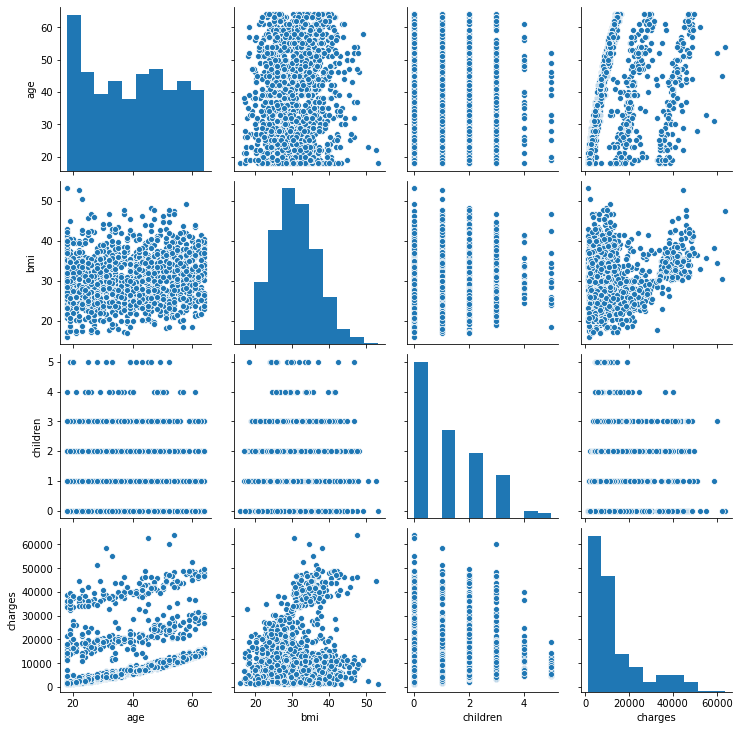

In [46]:
sns.pairplot(data)
plt.show()

# 4. Answer the following questions with statistical evidence

a. Do charges of people who smoke differ significantly from the
people who don't?

In [47]:
data.smoker.value_counts() #Get the counts for smokers and non-smokers

no     1064
yes     274
Name: smoker, dtype: int64

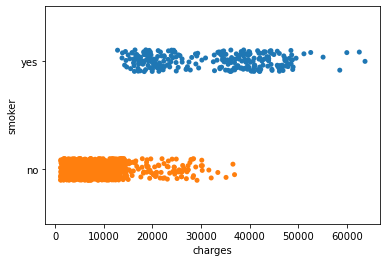

In [48]:
sns.stripplot(data['charges'],data['smoker']); #Plot the data to get better idea

Inference:
The charges for smoker are definitely more than that of non-smokers as observed from the above plot

In [49]:
# Perform T-test to check dependancy of smoking on charges
Ho="Charges of smokers and non-smokers are same" # null hypothesis statement
Ha="Charges of smokers and non-smokers are not the same" #alternate hypothesis


x=np.array(data[data.smoker=='yes'].charges)
y=np.array(data[data.smoker=='no'].charges)

t,p_value = stats.ttest_ind(x,y,axis=0)

#considering significance level as 0.05

if p_value < 0.05:
     print(f'{Ha}  as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho}  as the p_value ({p_value}) > 0.05')

Charges of smokers and non-smokers are not the same  as the p_value (8.271435842177219e-283) < 0.05


Inference : Smokers are claiming more amount than that of non-smokers

b.Does bmi of males differ significantly from that of females?

In [50]:
data.sex.value_counts() #Get the gender wise count

male      676
female    662
Name: sex, dtype: int64

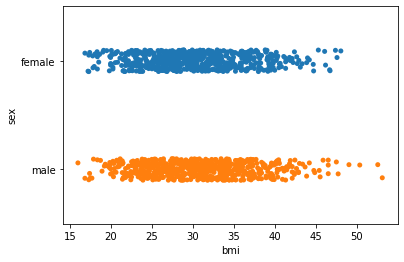

In [51]:
sns.stripplot(data['bmi'],data['sex']); #Plot the bmi and gender wise data

Inference:
From the above plot, it appears that there is no significant difference between age and bmi hence no relationship between them

In [52]:
# Perform T-test to check dependancy of bmi on sex
Ho = "Gender has no effect on bmi" #null hypothesis
Ha= "Gender has effect on bmi" # alternate hypothesis

x=np.array(data[data.sex=='male'].bmi) #Create array for male bmi data
y=np.array(data[data.sex=='female'].bmi) #Create array for female bmi data

t,p_value = stats.ttest_ind(x,y,axis=0) #Get the t test value

#considering significance level as 0.05

if p_value < 0.05:
     print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Gender has no effect on bmi as the p_value (0.08997637178984932) > 0.05


Inference : bmi of gender are almost identical

c. Is the proportion of smokers significantly different in different
genders?

In [53]:
#Let's use chi square test verify if the proportion of smokers significantly different in different genders

Ho="Gender has no effect on smoking habits" #null hypothesis
Ha="Gender has an effect on smoking habits" #alternate hypothesis

crosstab = pd.crosstab(data['sex'],data['smoker']) #Create a cross table to get the data

chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(crosstab) # Perfrom chi square test

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

if p_value < 0.05:
    print(f'{Ha} as as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as as the p_value ({p_value}) > 0.05')

crosstab

Chi-square statistic 7.39291 P value 0.006548 Degrees of freedom 1
Gender has an effect on smoking habits as as the p_value (0.006548143503580696) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


Inference : Proportion of smokers in male  is different than that of females

f. Is the distribution of bmi across women with no children, one child
and two children, the same?

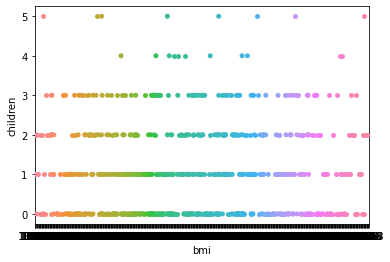

In [54]:
sns.stripplot(data['bmi'], data[data['sex']== 'female']['children']); 
#Simply plot the data for females with different number of children

In [55]:
#Test to see if the distributions of bmi values of women with no children, one child and two children, the same

Ho="No. of children has no effect on bmi" #null hypothesis
Ha="No. of children has effect on bmi" #alternate hypothesis

data_female= data.loc[data['sex'] == 'female'] #Create new data frame with data for female gender only

data_female #Verify the data

zero_children=data_female[data_female.children==0]['bmi'] # Select data for female with no children
one_children=data_female[data_female.children==1]['bmi'] # Select data for female with 1 child
two_children=data_female[data_female.children==2]['bmi'] # Select data for female with 2 children


f_stat, p_value = stats.f_oneway(zero_children,one_children,two_children)

if p_value < 0.05:  
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

No. of children has no effect on bmi as the p_value (0.7158579926754841) > 0.05


Inference : bmi value is independent of number of children the feamle has